## <p style="text-align: right;"> &#9989; Nick Sleeper

# CMSE 202 Final (Section 003 - Fall 2023)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. 

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You can also use any publicly available generative AI tool, if you find such a tool to be useful, **but you must properly cite the tool in your exam submission if you do so**.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

The maximum number of points is: **46 Points**


---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Nick Sleeper**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (4 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `final` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
git clone https://github.com/Sleepah/CMSE202-f23-turnin/CMSE202-003-Final_STUDENT.ipynb


```

---
## Part 2: Generate a network graph from data (11 points)

&#9989; **Question 2.1 (2 points)** The adjacency matrix for a water supply network (**'h2o_adj.txt'**) is provided where the nodes are water stations and edges represent pipes between them. When a pair of nodes are connected with each other, there exists a pipe supplying the water between them. 

In addition, the 2D coordinates of the water stations are provided in `h2o_position.txt' in an arbitrary coordinate system.  

Download and load the data from 'h2o_adj.txt' and `h2o_position.txt' 

**You can download the files from here:**

https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_adj.txt

https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_position.txt


In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
from io import StringIO

# URLs of the files
url_adj = 'https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_adj.txt'
url_pos = 'https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/h2o_position.txt'

# Function to read the matrix from a URL
def read_matrix_from_url(url, delimiter=None, dtype=int):
    response = requests.get(url)
    data_str = StringIO(response.text)
    return np.loadtxt(data_str, delimiter=delimiter, dtype=dtype)

# Read the adjacency matrix and position data
# Use comma as the delimiter for both files
adjacency_matrix = read_matrix_from_url(url_adj, delimiter=',', dtype=int)
position_matrix = read_matrix_from_url(url_pos, delimiter=',', dtype=float)

&#9989; **Question 2.2 (3 points)** Now, construct a graph using Networkx. Display the graph and use the position information to place the water stations at the correct locations. 


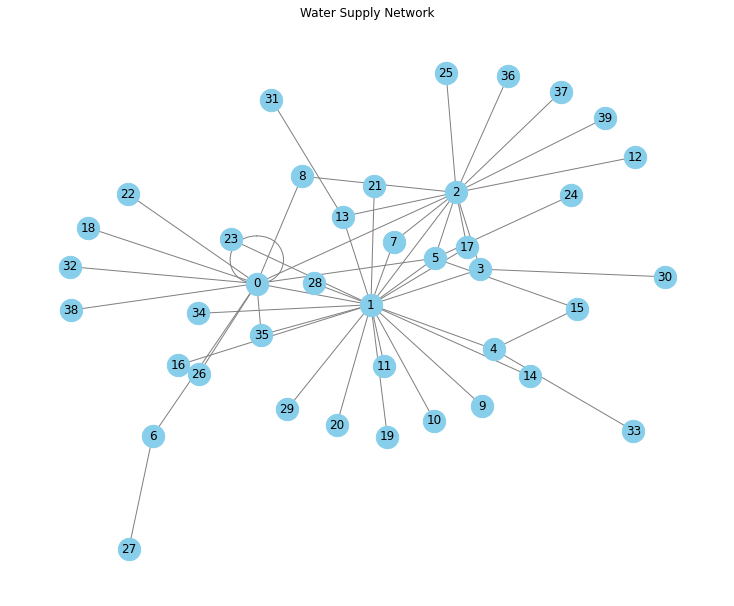

In [20]:
G = nx.from_numpy_matrix(adjacency_matrix)

# Create a dictionary for the positions of the nodes
positions = {i: position_matrix[i] for i in range(len(position_matrix))}

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos=positions, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title('Water Supply Network')
plt.show()

&#9989; **Question 2.3 (2 points)** Print the total number of nodes in the network and the number of edges


In [16]:
# Assuming the graph G is already created as per the previous steps

# Print the number of nodes
num_nodes = G.number_of_nodes()
print("Total number of nodes in the network:", num_nodes)

# Print the number of edges
num_edges = G.number_of_edges()
print("Total number of edges in the network:", num_edges)

Total number of nodes in the network: 40
Total number of edges in the network: 50


&#9989; **Question 2.4 (2 points)** In the interest of having an efficient water delivery system, we would like to know the shortest path (in terms of fewest number of edges) from one water station to another station.  Networkx has a convenient method to find these paths.  Using this method, answer the following questions:  
* Taking the shortest path, how many nodes are in-between node 27 and 20?  
* Likewise, taking the shortest path, how many edges (water pipes) are in-between node 27 and 20?


In [17]:
# Assuming the graph G is already created

# Nodes for which we need to find the shortest path
start_node = 27
end_node = 20

# Find the shortest path
shortest_path = nx.shortest_path(G, source=start_node, target=end_node)

# Print the shortest path
print("Shortest path between node 27 and node 20:", shortest_path)

# Calculate the number of nodes and edges in the shortest path
num_nodes_in_path = len(shortest_path) - 1  # subtract 1 because the path includes both start and end nodes
num_edges_in_path = len(shortest_path) - 2  # one less than the number of nodes in the path

# Print the results
print("Number of nodes in-between node 27 and 20:", num_nodes_in_path)
print("Number of edges in-between node 27 and 20:", num_edges_in_path)

Shortest path between node 27 and node 20: [27, 6, 0, 1, 20]
Number of nodes in-between node 27 and 20: 4
Number of edges in-between node 27 and 20: 3


&#9989; **Question 2.5 (1 point)** Taking this shortest path between node 27 and 20, what is the physical distance between these water stations?  In other words, how long is the pipe that runs along this shortest path?  

Hint: Use the information in the position data file to determine the physical (euclidean) distance between nodes.

Note: If you are stumped on this, recommend completing other sections of exam before working on this (only worth 1 point).  


In [18]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Calculate the total distance along the shortest path
total_distance = 0
for i in range(len(shortest_path) - 1):
    node1 = shortest_path[i]
    node2 = shortest_path[i + 1]
    total_distance += euclidean_distance(position_matrix[node1], position_matrix[node2])

# Print the total physical distance
print("Physical distance between node 27 and 20 along the shortest path:", total_distance)

Physical distance between node 27 and 20 along the shortest path: 1.8122130214473255


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**
m
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (19 points)

 <img src="https://www.egr.msu.edu/~aalessio/imgs/the-proportions-of-the-human-figure-leonardo-da-vinci.png"
     alt="da vinci human"
     align="right"  
     width="150" /> 

<a href="https://en.wikipedia.org/wiki/Anthropometry">**Anthropometry**</a> is the scientific study of the measurements and proportions of the human body.  This field has a critical role in several industries including clothing design, ergonomics, healthcare, consumer safety, and architecture. 


The "anthrokids3_subset.csv" file contains measurements on over 1700 children with 5 columns with the following measures: 

**[Age (years), Weight (kg), Height (cm),  Waist Circumference (cm) ,Head Circumference (cm)]**  

These data are a subset of the data acquired in the <a href="http://mreed.umtri.umich.edu/mreed/downloads.html#child_anthro">Synder et al, 1975: ANTHROPOMETRY OF INFANTS,CHILDREN, AND YOUTHS TO AGE 18 FOR PRODUCT SAFETY DESIGN,</a> performed by the U.S. Consumer Product Safety Commission to design some of the original car seats for children. 

The dataset is available here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/anthrokids3_subset.csv`

&#9989; **Question 3.1 (2 points)**: To get started, **download the `anthrokids3_subset.csv` file and place it in the same directory as your notebook**, then **read in the `anthrokids3_subset.csv` dataset** and finally **display the first and last few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [21]:
import pandas as pd

# URL of the dataset
url = 'https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/anthrokids3_subset.csv'

# Read the dataset from the URL
data = pd.read_csv(url)

# Display the first few rows of the data
print("First few rows of the dataset:")
print(data.head())

# Display the last few rows of the data
print("\nLast few rows of the dataset:")
print(data.tail())

First few rows of the dataset:
     age  weight  height  waist_circum  head_circum
0  4.219    15.5   103.3          47.5         49.8
1  4.326    17.6   103.9          49.8         50.6
2  4.476    23.0   111.2          52.0         51.2
3  3.841    16.5    99.7          49.1         48.9
4  3.460    15.0    99.7          46.5         47.3

Last few rows of the dataset:
        age  weight  height  waist_circum  head_circum
1772  4.704    20.1   108.6          57.4         52.8
1773  4.131    17.8   100.8          50.6         49.7
1774  5.120    21.7   114.9          53.1         51.2
1775  5.342    20.7   112.1          52.9         51.9
1776  5.495    18.1   110.8          46.8         48.9


&#9989; **Question 3.2 (3 points)**: **Make a scatter plot** with the `height` on the $y$-axis and the `age` on the $x$-axis. **Be sure to label your axes appropriately.**

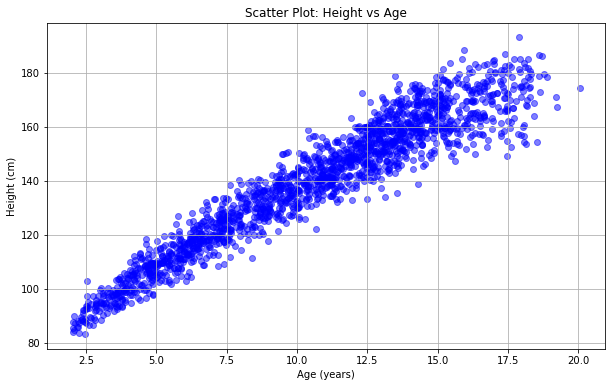

In [22]:
import matplotlib.pyplot as plt

# Scatter plot: height vs. age
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['height'], color='blue', alpha=0.5)
plt.title("Scatter Plot: Height vs Age")
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.grid(True)
plt.show()

&#9989; **Question 3.3 (5 points)**: Using the `OLS` method in `statsmodels`, **perform ordinary least squares regression** with `age` as the independent variable and `height` as the dependent variable. **Display the results summary**.

In [23]:
import statsmodels.api as sm

# Assuming 'data' is your DataFrame

# Define the independent variable (age) and add a constant to the model (for the intercept)
X = sm.add_constant(data['age'])  # Independent variable (age)
y = data['height']  # Dependent variable (height)

# Perform the OLS regression
model = sm.OLS(y, X).fit()

# Display the results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.868e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:26:41   Log-Likelihood:                -5991.9
No. Observations:                1777   AIC:                         1.199e+04
Df Residuals:                    1775   BIC:                         1.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.0976      0.453    181.046      0.0

&#9989; **Question 3.4 (1 points)**: **Based solely on the OLS results summary**, does a linear model fit this data well? Briefly justify your answer, **in your own words**, using details from the OLS results summary.

Based on the OLS regression results summary, a linear model appears to fit this data well. TThe R-squared value is approximately 0.913, which is high. This value indicates that about 91.3% of the variability in the dependent variable (height) can be explained by the independent variable (age). And a high R-squared value generally suggests a good fit of the model to the data.

&#9989; **Question 3.5 (2 points)**: **Based solely on the OLS results summary**, what is the relationship between height and age.  In other words, what is the model (i.e., equation) that relates these variables.  Below, you should complete $height = ????$

height = 82.0976 + 5.4444 × age 

&#9989; **Question 3.6 (2 points)**: Make a plot of the original data of height vs age (same as scatter plot above) and add the display of the fitted function returned from OLS above.  You can use any method available to make this display.   **Be sure to label your axes appropriately.**

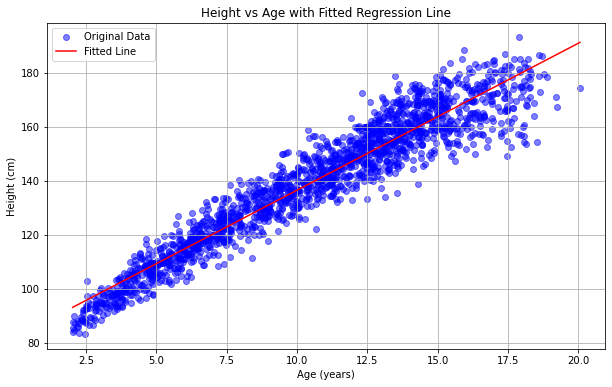

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the original data as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['height'], color='blue', alpha=0.5, label='Original Data')

# Regression coefficients
intercept = 82.0976  # Replace with the actual intercept from your model
slope = 5.4444  # Replace with the actual slope from your model

# Calculate the fitted values
ages = np.linspace(data['age'].min(), data['age'].max(), 100)
fitted_heights = intercept + slope * ages

# Add the regression line to the plot
plt.plot(ages, fitted_heights, color='red', label='Fitted Line')

# Labeling the plot
plt.title("Height vs Age with Fitted Regression Line")
plt.xlabel("Age (years)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()


&#9989; **Question 3.7 (3 points)**: Perform multiple regression with this data set to predict height from age and one additional variable.  Basically, make a model of how height is related to age and one other variable of your choosing from the dataset.  

In [25]:
import statsmodels.api as sm

# Define the independent variables (age and weight) and add a constant to the model
X = sm.add_constant(data[['age', 'weight']])  # Independent variables: age and weight
y = data['height']  # Dependent variable: height

# Perform the multiple regression
model = sm.OLS(y, X).fit()

# Display the results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:31:52   Log-Likelihood:                -5653.4
No. Observations:                1777   AIC:                         1.131e+04
Df Residuals:                    1774   BIC:                         1.133e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6195      0.375    220.117      0.0

&#9989; **Question 3.8 (1 points)**: Is your multiple regression model better than your single regression model of height vs age?  **In your own words**, provide a justification for your conclusion.

Yes, the multiple regression model that includes both age and weight as independent variables appears to be better than the single regression model that only includes age, for predicting height. The multiple regression model's higher R-squared value and the statistical significance of both predictors (age and weight) suggest that it is a better fit for the data than the single regression model.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (13 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to identify the age group (as young, middle, old) of the subjects in the anthrokids data set.   


&#9989; To get started, **run the code cell below**. This loads the anthrokids dataset, and divides it into features and labels.  stores the features into a numpy array called `anthro_features` and stores the class labels into a numpy array called `anthro_labels`

In [29]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
import pandas as pd
anthrokids = pd.read_csv(url)
anthro_features = anthrokids.drop(columns=['age'])

anthrokids["age_group"] = pd.qcut(anthrokids["age"],3,labels=["young","middle","older"])
anthro_labels=anthrokids['age_group']
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

&#9989; **Question 4.1 (2 points)**: For this dataset, using complete sentences, print the number of different features in this data and the number of different subjects.


In [30]:
# Number of features
num_features = anthro_features.shape[1]

# Number of subjects (rows in the dataset)
num_subjects = anthro_features.shape[0]

# Print the results
print("Number of different features in the data:", num_features)
print("Number of different subjects in the data:", num_subjects)


Number of different features in the data: 4
Number of different subjects in the data: 1777


Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.2 (3 points)**: **Use the `train_test_split()` method** from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.75` and `random_state` of `2023`. You should now have a training and a testing set with "labels" and "features" each. Finally, **print the shape of your training features and testing features** to verify that your train-test-split did what it was supposed to.

In [31]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(anthro_features, anthro_labels, train_size=0.75, random_state=2023)

# Print the shape of the training and testing feature sets
print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)

Shape of training features: (1332, 4)
Shape of testing features: (445, 4)


&#9989; **Question 4.3 (6 points)**: **Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `rbf` kernel and set the hyper-parameter `C=10` and `gamma=0.001.` **Fit your training set** and use the resulting fit to  **predict your the testing set** so you get predicted labels for the testing set. Finally, **print the performance statistics** on the testing set using the `confusion_matrix()` and `classification_report()` methods.

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Create the SVM classifier
svm_classifier = SVC(kernel='rbf', C=10, gamma=0.001)

# Fit the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[116  20  13]
 [ 22 129   0]
 [ 15   0 130]]

Classification Report:
              precision    recall  f1-score   support

      middle       0.76      0.78      0.77       149
       older       0.87      0.85      0.86       151
       young       0.91      0.90      0.90       145

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



---

&#9989; **Question 4.4 (2 point)**: Answer the following questions in your own words:

A. Does this classifier work well?  

B. Roughly what percentage of the time did the classifier predict the correct label on the testing set?  



A. Based on the classification report and confusion matrix, the classifier performs fairly well but not perfectly. <br>
B. The overall accuracy of the classifier is 84%, as indicated by the 'accuracy' score in the classification report. 

In [ ]:
### Put your code for Question 4.4 here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L.